# Proyek Analisis Data: [E-commerce Public Dataset]
- **Nama:** [Adam Havenia Pratama]
- **Email:** [adamhavenia14@gmail.com]
- **ID Dicoding:** [adam_hp]

## Menentukan Pertanyaan Bisnis

- Produk/Kategori Apa yang Paling Banyak Dibeli?
- Di Lokasi Mana Penjualan Paling Tinggi?
- Apakah Ada Waktu Tertentu yang Memiliki Penjualan Tertinggi?
- Bagaimana Metode Pembayaran Mempengaruhi Penjualan?
- Apakah Review Pelanggan Terkait dengan Penjualan? 
- Seberapa Besar Jumlah Pelanggan Baru vs. Pelanggan Lama?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('data/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocaytion_df = pd.read_csv('data/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocaytion_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('data/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('data/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
order_ds_df = pd.read_csv('data/E-Commerce Public Dataset/orders_dataset.csv')
order_ds_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products_category_df = pd.read_csv('data/E-Commerce Public Dataset/product_category_name_translation.csv')
products_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('data/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('data/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Banyak data yang hilang atau tidak lengkap
- Banyak meta data yang tidak diperlukan dalam analisis

### Assessing Data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print('Jumlah duplikasi:', customers_df.duplicated().sum())
print('Jumlah missing value:', customers_df.isna().sum().sum())
customers_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
geolocaytion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
print('Jumlah duplikasi:', geolocaytion_df.duplicated().sum())
print('Jumlah missing value:', geolocaytion_df.isnull().sum().sum())
geolocaytion_df.describe()

Jumlah duplikasi: 261831
Jumlah missing value: 0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
print('Jumlah duplikasi:', order_items_df.duplicated().sum())
print('Jumlah missing value:', order_items_df.isnull().sum().sum())
order_items_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: 0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
print('Jumlah duplikasi:', order_payments_df.duplicated().sum())
print('Jumlah missing value:', order_payments_df.isnull().sum().sum())
order_payments_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
print('Jumlah duplikasi:', order_reviews_df.duplicated().sum())
order_reviews_df.isna().sum()

Jumlah duplikasi: 0


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
order_ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
print('Jumlah duplikasi:', order_ds_df.duplicated().sum())
print('Jumlah missing value:', order_ds_df.isnull().sum())
order_ds_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [24]:
print('Jumlah missing value:', order_ds_df.isnull().sum().sum())

Jumlah missing value: 4908


In [25]:
products_category_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
print('Jumlah duplikasi:', products_category_df.duplicated().sum())
print('Jumlah missing value:', products_category_df.isnull().sum().sum())
products_category_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: 0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
print('Jumlah duplikasi:', products_df.duplicated().sum())
products_df.isna().sum()

Jumlah duplikasi: 0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
print('Jumlah missing value:', products_df.isna().sum().sum())

Jumlah missing value: 2448


In [30]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [31]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
print('Jumlah duplikasi:', sellers_df.duplicated().sum())
print('Jumlah missing value:', sellers_df.isnull().sum().sum())
sellers_df.describe()

Jumlah duplikasi: 0
Jumlah missing value: 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Terdapat 261831 duplikasi data dari geolocation dataset
- Terdapat missing value sebanyak 145903 order review dataset tetapi sepertinya tidak perlu di perbaiki 
- Terdapat 4908 missing value pada order dataset
- Terdpaat 2448 missing value pada produk dataset

### Cleaning Data

In [33]:
geolocaytion_df.drop_duplicates(inplace=True)
print('Jumlah duplikasi:', geolocaytion_df.duplicated().sum())

Jumlah duplikasi: 0


In [34]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [35]:
order_reviews_df.fillna('No Comment', inplace=True)
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [36]:
order_ds_df[order_ds_df.order_delivered_customer_date.isna()]
order_ds_df[order_ds_df.order_estimated_delivery_date.isna()]
order_ds_df[order_ds_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [37]:
order_ds_df.fillna('No Date', inplace=True)
order_ds_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [38]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [39]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [40]:
products_df.fillna(value='No Category', inplace=True)
products_df.isna().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3380017307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value='No Category', inplace=True)


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [41]:
products_df.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 67, dtype: int64

**Insight:**
- Data sudah bersih missing value telah dihilangkan.
- Data sudah di perbaiki terkait dengan data yang duplicate

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
# EDA customers_df
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [43]:
#EDA geolocation_df
geolocaytion_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [44]:
#EDA order_items_df
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [45]:
#EDA order_payments_df
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [46]:
#EDA order_reviews_df
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,No Comment,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [47]:
#EDA order_ds_df
order_ds_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,No Date,No Date,No Date,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


In [48]:
#EDA products_category_df
products_category_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [49]:
#EDA products_df
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,No Category,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [50]:
# Merge relevant dataframes to create All_df
# Start with order items and get product categories
All_df = order_items_df.merge(products_df[['product_id', 'product_category_name']], on='product_id')
All_df = All_df.merge(products_category_df, on='product_category_name', how='left')

# Add order information including timestamps
All_df = All_df.merge(order_ds_df, on='order_id')

# Add customer information
All_df = All_df.merge(customers_df, on='customer_id')

# Add payment information
All_df = All_df.merge(order_payments_df[['order_id', 'payment_type', 'payment_value']], on='order_id')

# Add review information
All_df = All_df.merge(order_reviews_df[['order_id', 'review_score']], on='order_id')

# Convert timestamp columns to datetime
timestamp_columns = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date', 
                    'order_estimated_delivery_date']

for col in timestamp_columns:
    All_df[col] = pd.to_datetime(All_df[col], errors='coerce')  # Use errors='coerce' to handle invalid dates

# Add some useful derived columns
All_df['order_month'] = All_df['order_purchase_timestamp'].dt.month
All_df['order_year'] = All_df['order_purchase_timestamp'].dt.year
All_df['order_dayofweek'] = All_df['order_purchase_timestamp'].dt.dayofweek
All_df['total_order_value'] = All_df['price'] + All_df['freight_value']

# Mark if customer is new or returning
customer_first_purchase = All_df.groupby('customer_unique_id')['order_purchase_timestamp'].min()
All_df['first_purchase_date'] = All_df['customer_unique_id'].map(customer_first_purchase)
All_df['is_new_customer'] = All_df['order_purchase_timestamp'] == All_df['first_purchase_date']

print("All_df created successfully with shape:", All_df.shape)

All_df created successfully with shape: (117329, 29)


**Insight:**
- Tahapan ini digunakan untuk menganalasis informasi penting pada dataset
- Diperoleh data merge dari data penting yang telah diproses dalam satu file csv yang bernama All_df

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk/Kategori Apa yang Paling Banyak Dibeli?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3797882440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette=custom_colors)


<Figure size 1500x600 with 0 Axes>

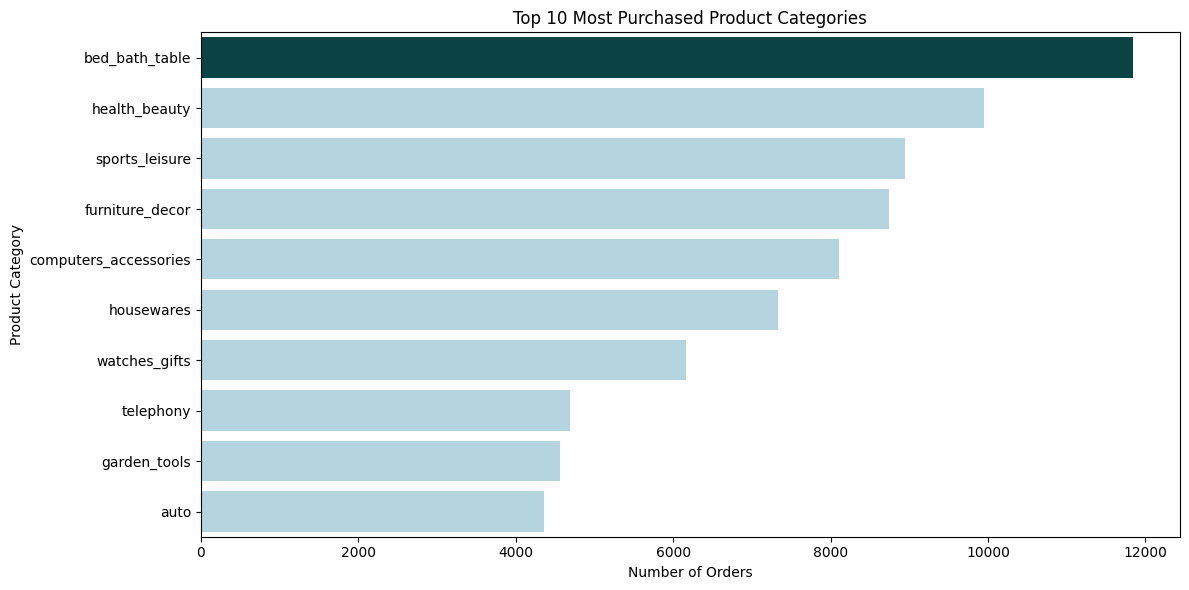

<Figure size 1500x600 with 0 Axes>

In [51]:
# Create visualization for top product categories
plt.figure(figsize=(12,6))
category_counts = All_df['product_category_name_english'].value_counts().head(10)

custom_colors = ['#004D4D','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6']

# Create bar plot
sns.barplot(x=category_counts.values, y=category_counts.index, palette=custom_colors)

plt.title('Top 10 Most Purchased Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

plt.tight_layout()

plt.figure(figsize=(15,6))

**Insight:**
- Produk atau kategori yang paling banyak dibeli adalah bed_bath_table, kemudian disusul oleh produk helath_beauty dan seterusnya. 

### Pertanyaan 2: Di Lokasi Mana Penjualan Paling Tinggi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\857273859.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette = custom_colors)


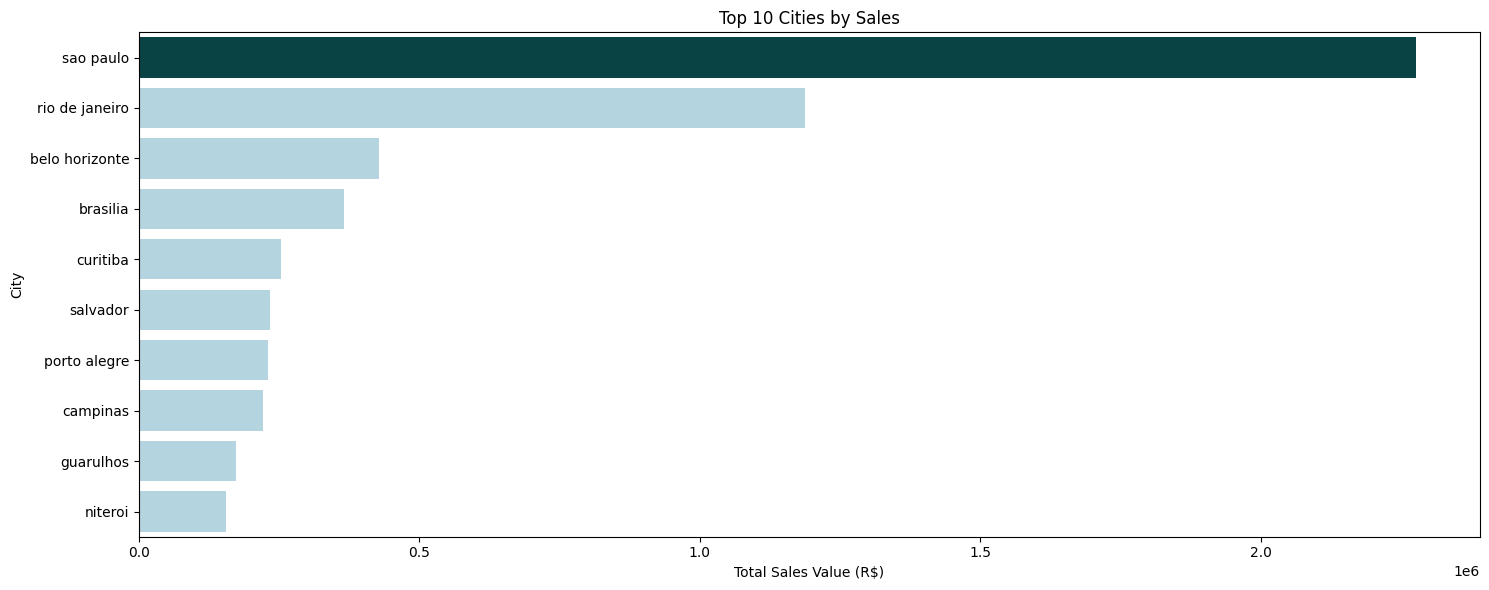

In [52]:
# Create a plot to show top 10 cities by sales
plt.figure(figsize=(15, 6))
custom_colors = ['#004D4D','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6']
# Calculate total sales by city
city_sales = All_df.groupby('customer_city')['total_order_value'].sum().sort_values(ascending=False).head(10)

# Create bar plot for top 10 cities
sns.barplot(x=city_sales.values, y=city_sales.index, palette = custom_colors)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales Value (R$)')
plt.ylabel('City')
plt.tight_layout()

**Insight:** 
- Kota atau lokasi dengan penjualan tertinggi adalah sao paulo

### Pertanyaan 3: Apakah ada waktu tertentu yang memiliki penjualan tertinggi?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\2414167192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax1, palette = color1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\2414167192.py:8: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax1, palette = color1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\2414167192.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[day_names[i] for i in daily_sales.index], y=daily_sales.values, ax=ax2, palette = color2)
C:\Users\LENOVO\AppDat

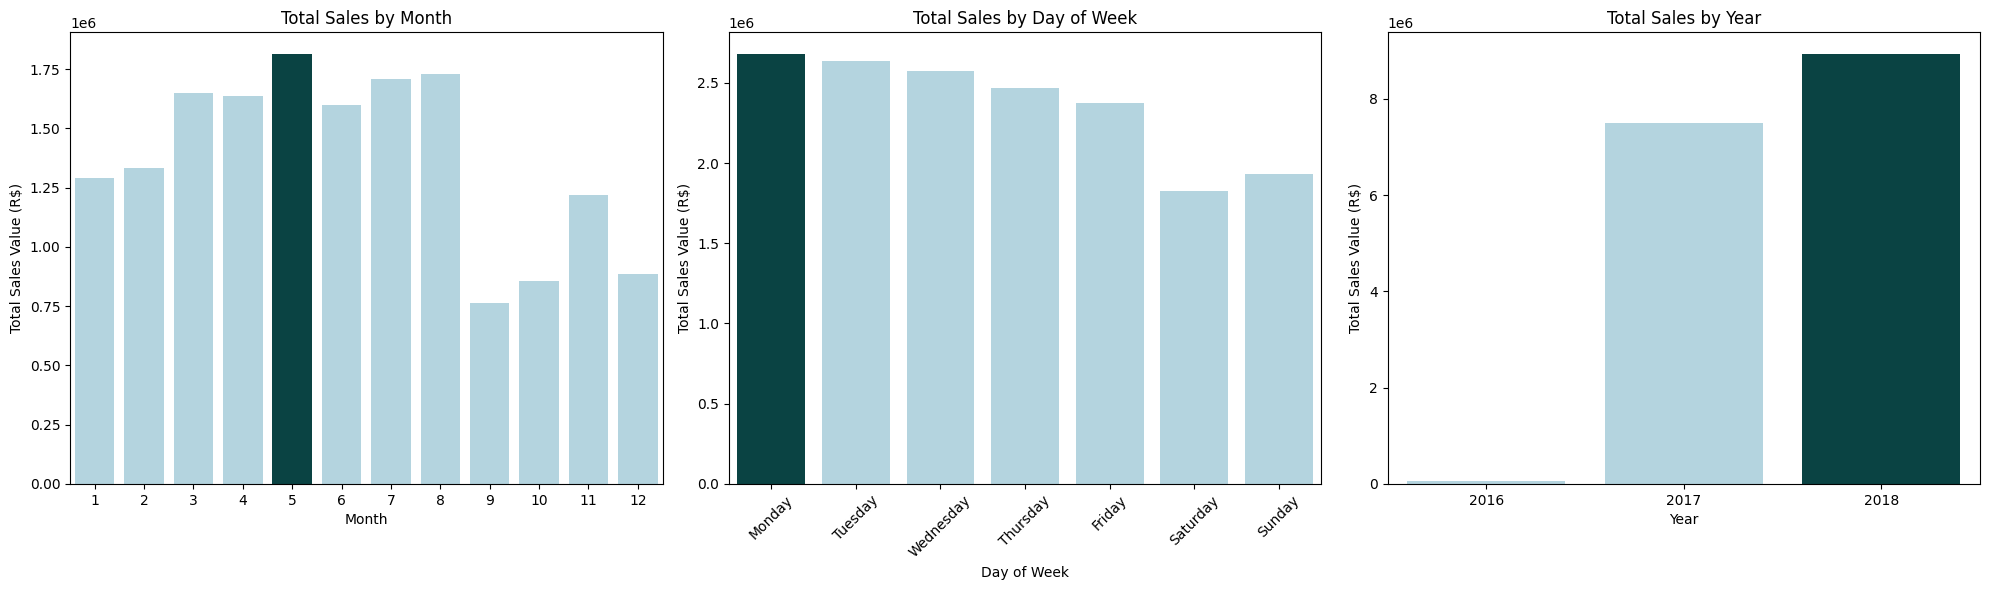

In [53]:
# Set up the figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
color1 = ['#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#004D4D','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6']
color2= ['#004D4D','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6']
color3= ['#ADD8E6','#ADD8E6','#004D4D']
# Plot 1: Sales by Month
monthly_sales = All_df.groupby('order_month')['total_order_value'].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax1, palette = color1)
ax1.set_title('Total Sales by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales Value (R$)')

# Plot 2: Sales by Day of Week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = All_df.groupby('order_dayofweek')['total_order_value'].sum()
sns.barplot(x=[day_names[i] for i in daily_sales.index], y=daily_sales.values, ax=ax2, palette = color2)
ax2.set_title('Total Sales by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Total Sales Value (R$)')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Plot 3: Sales by Year
yearly_sales = All_df.groupby('order_year')['total_order_value'].sum()
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, ax=ax3, palette = color3)
ax3.set_title('Total Sales by Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Sales Value (R$)')

plt.tight_layout()
plt.show()

**Insight:** 
- Tahun penjualan tertinggi adalah terjadi pada tahun 2018, sedangkan bulan dengan penjualan tertinggi adalah bulan mei dan kebanyakan pelanggan melakukan transaksi pada hari senin dimana hari tersbut merupakan hari weekdays

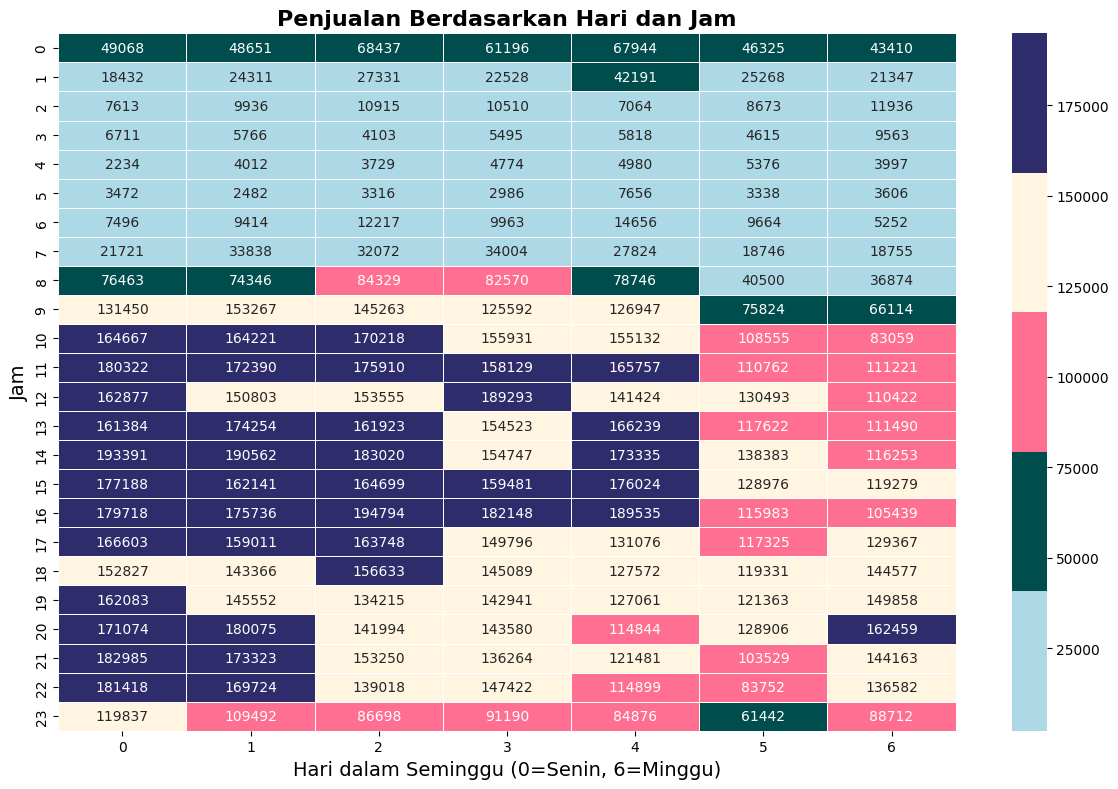

In [54]:
# Extract hour from order_purchase_timestamp
All_df['hour'] = All_df['order_purchase_timestamp'].dt.hour

# Pivot data agar cocok untuk heatmap
heatmap_data = All_df.pivot_table(values='total_order_value', 
                                  index='hour', 
                                  columns='order_dayofweek', 
                                  aggfunc='sum')

# Visualisasi heatmap dengan palet warna khusus
plt.figure(figsize=(12, 8))

# Menggunakan palet warna custom
custom_palette = ['#ADD8E6', '#004D4D', '#FF6F91', '#FFF5E1', '#2E2C6B']
sns.heatmap(heatmap_data, cmap=sns.color_palette(custom_palette, as_cmap=True), 
            annot=True, fmt=".0f", linewidths=0.5)

# Menambahkan judul dan label
plt.title("Penjualan Berdasarkan Hari dan Jam", fontsize=16, fontweight='bold')
plt.xlabel("Hari dalam Seminggu (0=Senin, 6=Minggu)", fontsize=14)
plt.ylabel("Jam", fontsize=14)

# Mengatur tata letak
plt.tight_layout()
plt.show()

**Insight:** 
- Dari visualisasi ini terlihat bahwa jam aktif pelanggan dalam menggunakan atau melakukan transaksi pada e-commerse adalah mulai pukul 10.00 hingga 22.00 pada hari weekdays. 

### Pertanyaan 4 : Bagaimana Metode pembayaran yang mempengaruhi penjualan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\2150999598.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_sales.index, y=payment_sales.values, palette = color1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\2150999598.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_avg.index, y=payment_avg.values, palette = color2)


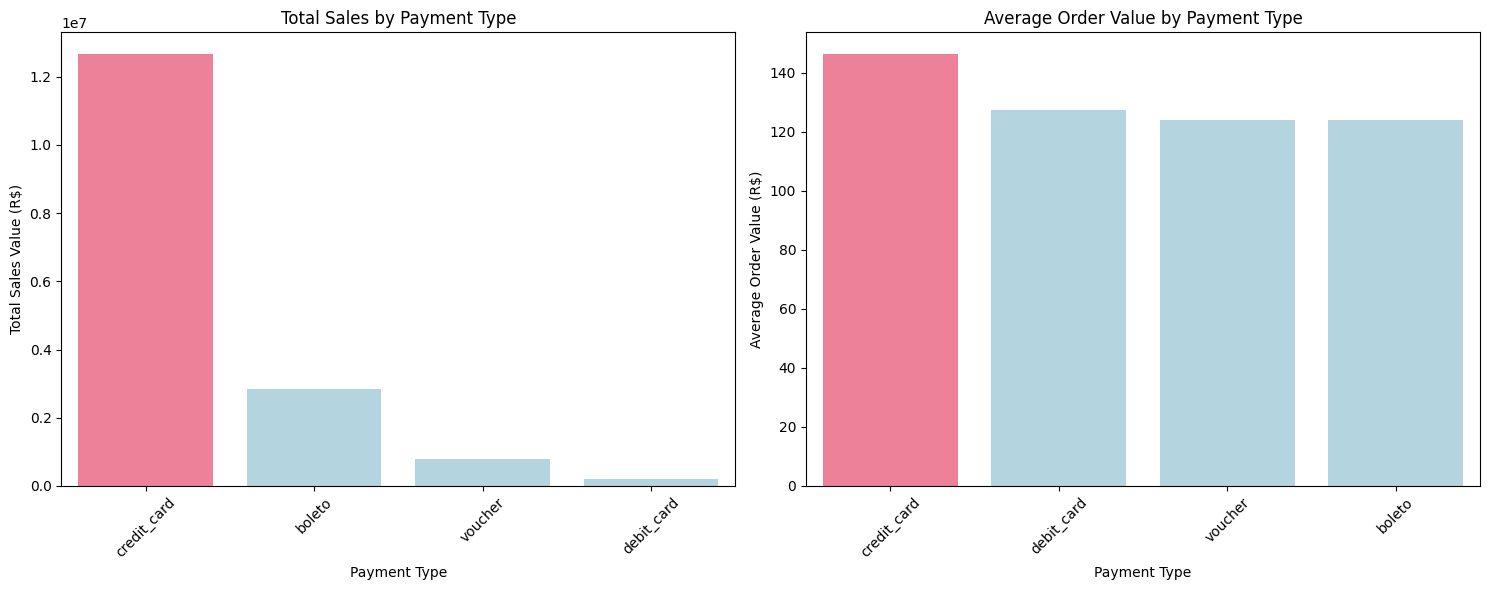

In [55]:
# Create figure with subplots
plt.figure(figsize=(15, 6))
color1 = ['#FF6F91','#ADD8E6','#ADD8E6','#ADD8E6']
color2 = ['#FF6F91','#ADD8E6','#ADD8E6','#ADD8E6']
# Plot 1: Total sales by payment type
payment_sales = All_df.groupby('payment_type')['total_order_value'].sum().sort_values(ascending=False)
plt.subplot(1, 2, 1)
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette = color1)
plt.title('Total Sales by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales Value (R$)')
plt.xticks(rotation=45)

# Plot 2: Average order value by payment type
payment_avg = All_df.groupby('payment_type')['total_order_value'].mean().sort_values(ascending=False)
plt.subplot(1, 2, 2)
sns.barplot(x=payment_avg.index, y=payment_avg.values, palette = color2)
plt.title('Average Order Value by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Order Value (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insight:** 
- Pelanggan yang melakukan transaksi banyak menggunakan credit_card atau kartu credit

### Pertanyaan 5: Apakah Review pelanggan terkait dengan penjualan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3552902203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_count_by_review.index, y=order_count_by_review.values, palette=color1)


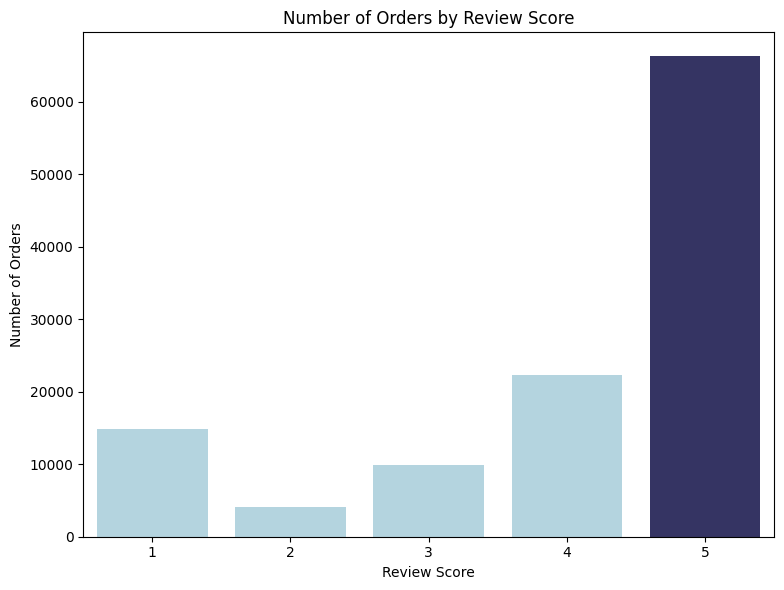

In [56]:
# Create figure with two subplots
plt.figure(figsize=(15, 6))
color1 = ['#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6','#2E2C6B']
# Plot 1: Number of orders by review score
plt.subplot(1, 2, 2)
order_count_by_review = All_df['review_score'].value_counts().sort_index()
sns.barplot(x=order_count_by_review.index, y=order_count_by_review.values, palette=color1)
plt.title('Number of Orders by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan hasil tersebut menunjukan bahwa banyak pelanggan yang memberikan review score 5, hal ini menunjukan bahwa pelanggan menyukai pelayanan maupun produk yang ada.

### Pertanyaan 6 : Seberapa besar jumlah pelanggan baru vs dengan pelanggan lama?

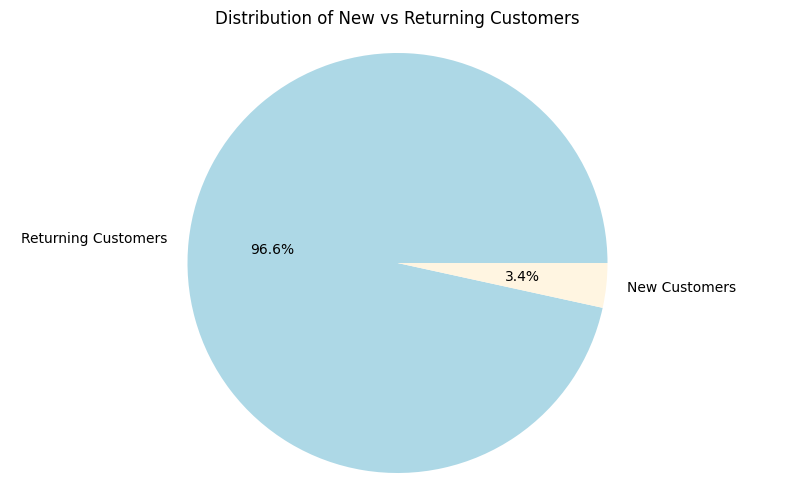


Customer Counts:
New Customers: 113,312
Returning Customers: 4,017


In [57]:
# Calculate customer counts
customer_type_counts = All_df['is_new_customer'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(customer_type_counts, 
    labels=['Returning Customers', 'New Customers'], 
    autopct='%1.1f%%',
    colors=['#ADD8E6','#FFF5E1'])

plt.title('Distribution of New vs Returning Customers')
plt.axis('equal')
plt.show()

# Print actual numbers
print("\nCustomer Counts:")
print(f"New Customers: {customer_type_counts[True]:,}")
print(f"Returning Customers: {customer_type_counts[False]:,}")

**Insight:**
- Berdasarkan diagram tersebut pelanggan lama menjadi pelanggan yang banyak menggunakan e-commerse dibandingkan dengan pelanggan baru dengan mayoritas sekitar 96,6%

## Analisis Lanjutan (Opsional)

In [58]:
rmf_df = All_df.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': lambda x: (All_df['order_purchase_timestamp'].max() - x.max()).days,
    'order_id': 'nunique',
    'total_order_value': 'sum'
})

In [59]:
rmf_df.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']
rmf_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [60]:
rmf_df.describe()

,recency,frequency,monetary
count,94720.000000,94720.000000,94720.000000
mean,242.437817,1.033742,174.100608
std,153.163707,0.210529,263.430637
min,0.000000,1.000000,10.070000
25%,118.000000,1.000000,64.000000
50%,223.000000,1.000000,110.760000
75%,352.000000,1.000000,188.660000
max,728.000000,16.000000,13664.080000


In [61]:
rmf_df.sort_values(by='recency', ascending=True).head()

,customer_unique_id,recency,frequency,monetary
94388,ff22e30958c13ffe219db7d711e8f564,0,2,332.92
67821,b701bebbdf478f5500348f03aff62121,4,1,33.23
12618,21dbe8eabd00b34492a939c540e2b1a7,4,1,14.29
1530,0421e7a23f21e5d54efed456aedbc513,4,1,119.42
13647,24ac2b4327e25baf39f2119e4228976a,4,1,93.75


In [62]:
rmf_df.sort_values(by='frequency', ascending=False).head()

,customer_unique_id,recency,frequency,monetary
52223,8d50f5eadf50201ccdcedfb9e2ac8455,13,16,902.04
23137,3e43e6105506432c953e165fb2acf44c,187,9,1172.67
37270,6469f99c1f9dfae7733b25662e7f1782,67,7,758.83
75005,ca77025e7201e3b30c44b472ff346268,93,7,1122.72
10212,1b6c7548a2a1f9037c1fd3ddfed95f33,200,7,1021.12


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3252416823.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax1, palette=custom_colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3252416823.py:10: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax1, palette=custom_colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3252416823.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recency_dist.index, y=recency_dist.values, ax=ax2, palette=custom_colors2)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel

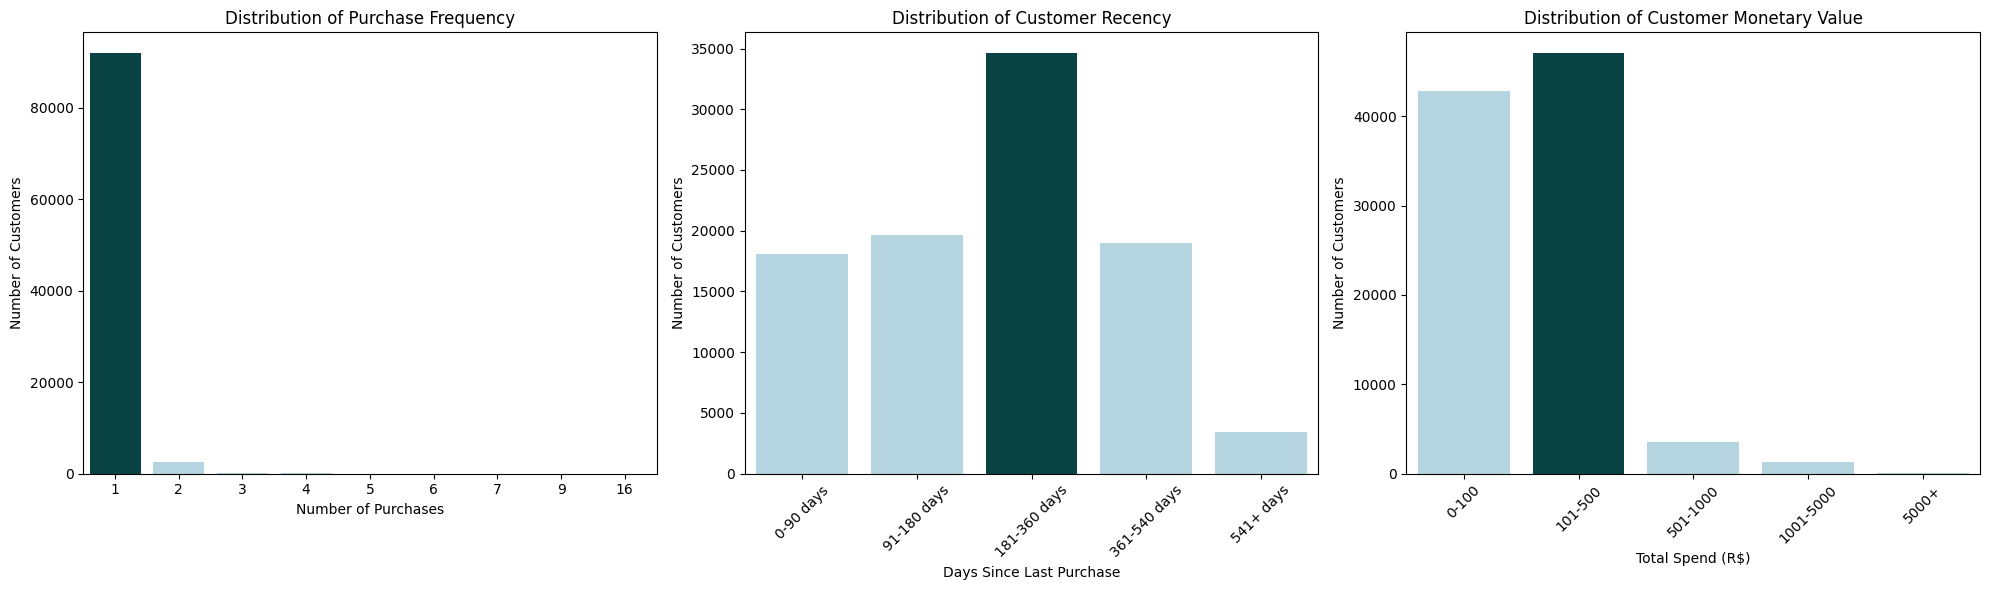

In [63]:
# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

custom_colors = ['#004D4D','#ADD8E6','#ADD8E6','#ADD8E6','#ADD8E6']
custom_colors2 = ['#ADD8E6','#ADD8E6','#004D4D','#ADD8E6','#ADD8E6']
custom_colors3 = ['#ADD8E6','#004D4D','#ADD8E6','#ADD8E6','#ADD8E6']

# Plot frequency distribution
freq_dist = rmf_df['frequency'].value_counts().sort_index()
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax1, palette=custom_colors)
ax1.set_title('Distribution of Purchase Frequency')
ax1.set_xlabel('Number of Purchases')
ax1.set_ylabel('Number of Customers')

# Plot recency distribution using bins
recency_bins = [0, 90, 180, 360, 540, 720]
recency_labels = ['0-90 days', '91-180 days', '181-360 days', '361-540 days', '541+ days']
rmf_df['recency_bin'] = pd.cut(rmf_df['recency'], bins=recency_bins, labels=recency_labels)
recency_dist = rmf_df['recency_bin'].value_counts()
sns.barplot(x=recency_dist.index, y=recency_dist.values, ax=ax2, palette=custom_colors2)
ax2.set_title('Distribution of Customer Recency')
ax2.set_xlabel('Days Since Last Purchase')
ax2.set_ylabel('Number of Customers')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Plot monetary distribution using bins
monetary_bins = [0, 100, 500, 1000, 5000, rmf_df['monetary'].max()]
monetary_labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
rmf_df['monetary_bin'] = pd.cut(rmf_df['monetary'], bins=monetary_bins, labels=monetary_labels)
monetary_dist = rmf_df['monetary_bin'].value_counts()
sns.barplot(x=monetary_dist.index, y=monetary_dist.values, ax=ax3, palette=custom_colors3)
ax3.set_title('Distribution of Customer Monetary Value')
ax3.set_xlabel('Total Spend (R$)')
ax3.set_ylabel('Number of Customers')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Tujuan**
Mengelompokkan pelanggan berdasarkan perilaku belanja mereka:
- Recency: Seberapa baru pelanggan terakhir kali bertransaksi.
- Frequency: Seberapa sering pelanggan bertransaksi.
- Monetary: Berapa banyak yang pelanggan belanjakan.

**Insight:**
- Mayoritas pelanggan hanya melakukan satu pembelian, dan jumlahnya jauh lebih banyak dibandingkan pelanggan yang melakukan pembelian lebih dari sekali.
- Sebagian besar pelanggan melakukan pembelian terakhir mereka dalam rentang 181-360 hari, diikuti oleh kelompok 0-90 hari.
- Sebagian besar pelanggan memiliki nilai pembelian dalam rentang Rp101 - Rp500, sementara jumlah pelanggan dengan nilai pembelian di atas Rp500 cukup rendah.

## Conclusion

- Conclution pertanyaan 1 : Kategori "bed_bath_table" merupakan kategori yang paling sering dibeli dengan jumlah pesanan paling tinggi dibandingkan kategori lainnya. Ini menunjukkan bahwa produk di kategori ini sangat diminati oleh pelanggan.
- Conclution pertanyaan 2 : Sao Paulo adalah kota dengan nilai penjualan tertinggi, secara signifikan mengungguli kota-kota lain. Hal ini menunjukkan bahwa São Paulo adalah pasar utama dengan kontribusi besar terhadap pendapatan keseluruhan.
- Conclution pertanyaan 3 : Penjualan bulanan tertinggi terjadi pada bulan Mei, sementara hari Senin memiliki nilai penjualan tertinggi dibandingkan hari-hari lainnya. Selain itu, penjualan tertinggi secara jam terjadi pada sore hingga malam hari (jam 17:00-20:00), terutama di hari kerja.Strategi pemasaran dapat difokuskan pada jam-jam dan hari-hari tersebut untuk memaksimalkan penjualan.
- Conclution pertanyaan 4 : kartu kredit adalah metode pembayaran yang paling dominan dengan nilai penjualan total tertinggi, jauh mengungguli metode lainnya. Meskipun rata-rata nilai pesanan (average order value) untuk semua metode pembayaran relatif seimbang, kartu kredit tetap unggul dalam volume transaksi. Hal ini menunjukkan bahwa kemudahan pembayaran dengan kartu kredit menjadi preferensi utama pelanggan dan perlu terus dioptimalkan sebagai metode pembayaran utama.
- Conclution pertanyaan 5 : Grafik menunjukkan bahwa mayoritas pesanan mendapatkan review score 5, menunjukkan tingkat kepuasan pelanggan yang tinggi. Namun, terdapat sejumlah pesanan dengan review score 1, yang menunjukkan pengalaman pelanggan yang buruk. Fokus pada analisis penyebab review rendah (1-2) dapat membantu meningkatkan kualitas layanan dan mengurangi ketidakpuasan di masa depan. Strategi mempertahankan kualitas tinggi untuk mempertahankan dominasi review score 5 juga sangat penting. 
- Conclution pertanyaan 6 : Grafik menunjukkan bahwa mayoritas pelanggan adalah returning customers (96,6%), sementara new customers hanya menyumbang 3,4% dari total pelanggan. Hal ini menunjukkan loyalitas pelanggan yang tinggi, tetapi potensi untuk menarik lebih banyak pelanggan baru masih belum maksimal. Strategi pemasaran untuk meningkatkan akuisisi pelanggan baru dapat menjadi fokus utama untuk memperluas basis pelanggan.
- Conclution Analisis Lanjutan : Grafik menunjukkan bahwa sebagian besar pelanggan melakukan satu kali pembelian saja, dengan sedikit yang melakukan pembelian berulang. Mayoritas pelanggan terakhir bertransaksi dalam 181-360 hari terakhir, dan nilai belanja pelanggan terkonsentrasi di rentang Rp101-Rp500. Fokus untuk meningkatkan frekuensi pembelian dengan strategi retensi dan program loyalitas dapat membantu memaksimalkan nilai pelanggan. Strategi upselling juga diperlukan untuk meningkatkan nilai belanja per pelanggan.